In [86]:
import numpy
numpy.seterr(divide='warn')
import pandas
from tkinter import Tk
from tkinter.filedialog import askdirectory
import seaborn

In [87]:
# Get directories for IMU data
forearmPath = "/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/School/Masters/BME_207/Term Project/IMU Analysis/ForearmMovement"#askdirectory(title='Select Folder Containing Forearm Data') # shows dialog box and return the path
print(forearmPath)
armPath = "/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/School/Masters/BME_207/Term Project/IMU Analysis/UpperArmMovementTimeMod"#askdirectory(title='Select Folder Containing Arm Data') # shows dialog box and return the path
print(armPath)
foreArmGData = pandas.read_csv("{}/Gyroscope.csv".format(forearmPath))
armGData = pandas.read_csv("{}/Gyroscope.csv".format(armPath))
# Truncate data to have same number of samples (temporary with contrived data)
minDataLength = min(len(armGData), len(foreArmGData))
foreArmGData = foreArmGData[:minDataLength]
armGData = armGData[:minDataLength]
# Initialize gyroscope data array(g1, g2) (2 arrays with # rows equal to # sample and each row [x, y, z])
gData = numpy.array([numpy.stack([foreArmGData['X (rad/s)'].values, foreArmGData['Y (rad/s)'].values, foreArmGData['Z (rad/s)'].values], 1),\
                    numpy.stack([armGData['X (rad/s)'].values, armGData['Y (rad/s)'].values, armGData['Z (rad/s)'].values], 1)])

/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/School/Masters/BME_207/Term Project/IMU Analysis/ForearmMovement
/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/School/Masters/BME_207/Term Project/IMU Analysis/UpperArmMovementTimeMod


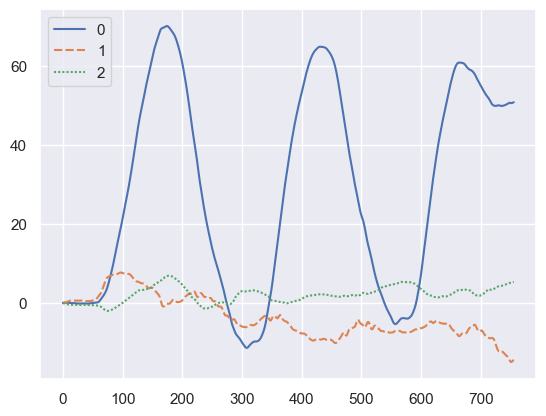

In [88]:
# Calculate time delta between samples in seconds
deltat = numpy.average(numpy.diff(foreArmGData['Time (s)'].values))
# Calculate angle moved for each time step by integrating gyroscope data over time
angleSteps = gData * deltat
angleData = numpy.cumsum(angleSteps, axis=1)
degreeData = numpy.rad2deg(angleData)
seaborn.set(style="darkgrid")
a = seaborn.lineplot(data=degreeData[0])

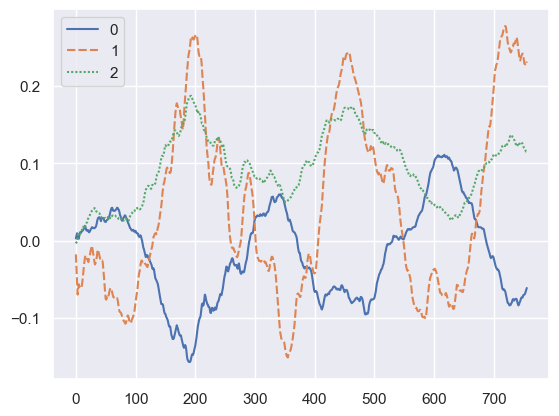

In [89]:

b = seaborn.lineplot(data=degreeData[1])

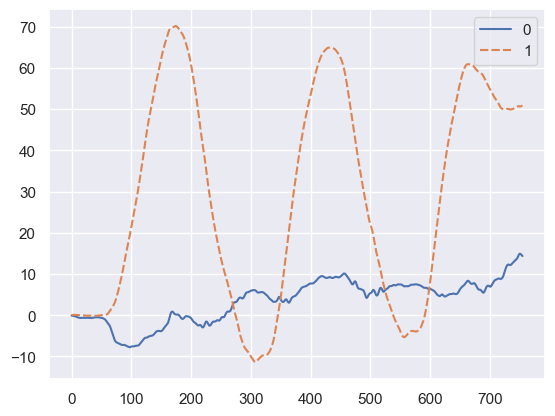

In [90]:
def getJEst(aEst):
    j1Est = numpy.array([numpy.float64(numpy.cos(aEst['angle1'])*numpy.cos(aEst['azimuth1'])), numpy.float64(numpy.cos(aEst['angle1'])*numpy.sin(aEst['azimuth1'])), numpy.float64(numpy.sin(aEst['angle1']))])
    j2Est = numpy.array([numpy.float64(numpy.cos(aEst['angle2'])*numpy.cos(aEst['azimuth2'])), numpy.float64(numpy.cos(aEst['angle2'])*numpy.sin(aEst['azimuth2'])), numpy.float64(numpy.sin(aEst['angle2']))])
    return numpy.array([j1Est, j2Est])


# Vector of angle and azimuth values for such that theta unit vector is parallel to x axis, perp to z and y (x axis is hinge axis)
aaVec = pandas.DataFrame({'angle1': [0], 'azimuth1': [0], 'angle2': [0], 'azimuth2': [0]})
jEst = getJEst(aaVec)
aRates = numpy.dot(gData[0], jEst[0])
aAngles = aRates * deltat
aData = numpy.cumsum(aAngles)
degreeAData = numpy.rad2deg(aData)
a = seaborn.lineplot(data=[degreeAData, degreeData[0].T[0]])
